## SIR

In [4]:
from rnpe.tasks import SIRSDE
from jax import random
import numpy as np
theta_key, x_key = random.split(random.PRNGKey(0))
task = SIRSDE(julia_env_path="..")
theta_true = task.sample_prior(theta_key, 1)
obs_original = task.simulate(x_key, theta_true, summarise=False)
obs_misspecified = task.misspecify(obs_original)

In [26]:
import pandas as pd
import numpy as np

d = {"Original": obs_original, "Misspecified": obs_misspecified}
df = pd.concat([
    pd.DataFrame(
        {
            "Source": k,
            "Infections": np.squeeze(v),
            "Days": np.arange(365)
        }
    ) for k,v in d.items()
])


/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


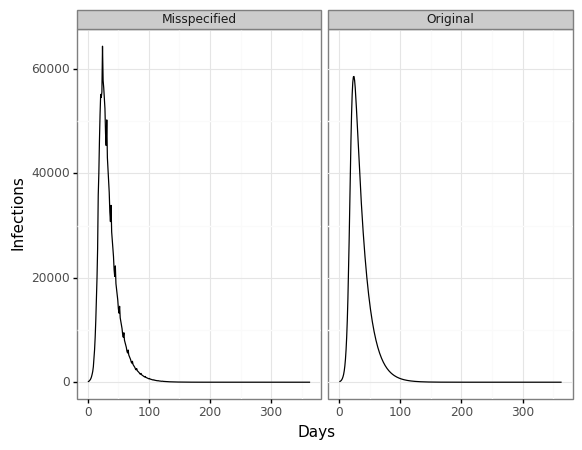

<ggplot: (8741501736738)>

In [27]:
from plotnine import ggplot, aes, geom_line, theme_bw, facet_wrap

(
    ggplot(df, aes(x="Days", y="Infections")) +
    geom_line() +
    facet_wrap("~Source") +
    theme_bw()
)


## Cancer

In [40]:
from rnpe.tasks import Cancer

theta_key, x_key = random.split(random.PRNGKey(1))

task = Cancer()
theta = task.sample_prior(theta_key, 1)
x = task.simulate(theta_key, theta, summarise=False)
y = task.simulate(theta_key, theta, summarise=False, necrosis=True)


In [41]:

d = {"Original": x, "Misspecified": y}
df = pd.concat([
    pd.DataFrame(
        {
            "Source": k,
            "x0": np.squeeze(v[0][0][:, 0]),
            "x1": np.squeeze(v[0][0][:, 1]),
            "cancer": v[0][1],
        }
    ) for k,v in d.items()
])

/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


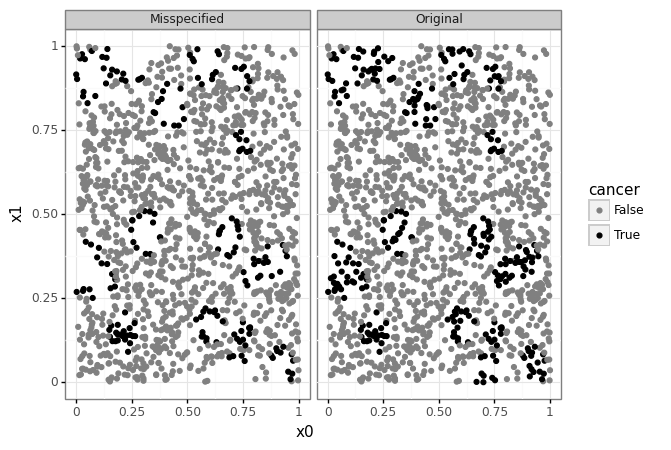

<ggplot: (8741493009917)>

In [43]:
from plotnine import ggplot, aes, geom_point, theme_bw, facet_wrap, scale_color_manual

(
    ggplot(df, aes(x="x0", y="x1", colour="cancer")) +
    geom_point() +
    facet_wrap("~Source") +
    theme_bw() +
    scale_color_manual(values=["grey", "black"])
)


In [ ]:
# void process

# void process vs thomas misspecification. Just focussing on cancer cells.
# Single locus model as misspecified model. Model with linkage for real data.
# selection, dominance and popsize
# modelling both selection and recombination together is challenging.

# two locus model and two single locus model: small recombination, high correlation
# true model epistasis and linkage,

# Wright-Fisher two locus